# Randomized Digital Nets Demo

In [1]:
import qmcpy as qp
import numpy as np
import matplotlib.pyplot as plt
import time

In [37]:
seed = 5
genseed = 123456789

### Getting started

Here is an unshifted, unscrambled net

In [28]:
dnet = qp.DigitalNetB2(randomize=False,dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       0
    graycode        0
    entropy         150032133369789790203792031222344119668
    spawn_key       ()
[[0.    0.    0.    0.    0.   ]
 [0.5   0.5   0.5   0.5   0.5  ]
 [0.25  0.75  0.75  0.75  0.25 ]
 [0.75  0.25  0.25  0.25  0.75 ]
 [0.125 0.625 0.375 0.125 0.125]
 [0.625 0.125 0.875 0.625 0.625]
 [0.375 0.375 0.625 0.875 0.375]
 [0.875 0.875 0.125 0.375 0.875]]


Here is an unscrambled net with a digital shift

In [29]:
dnet = qp.DigitalNetB2(randomize='DS',dimension = 5)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         62567103560908279330663453553833605173
    spawn_key       ()
[[7.62623674e-01 3.48216408e-01 7.98062592e-01 7.72050281e-01
  2.50536030e-01]
 [2.62623674e-01 8.48216408e-01 2.98062592e-01 2.72050281e-01
  7.50536030e-01]
 [5.12623674e-01 5.98216408e-01 4.80625923e-02 2.20502808e-02
  5.36030158e-04]
 [1.26236735e-02 9.82164084e-02 5.48062592e-01 5.22050281e-01
  5.00536030e-01]
 [8.87623674e-01 9.73216408e-01 6.73062592e-01 8.97050281e-01
  3.75536030e-01]
 [3.87623674e-01 4.73216408e-01 1.73062592e-01 3.97050281e-01
  8.75536030e-01]
 [6.37623674e-01 2.23216408e-01 4.23062592e-01 1.47050281e-01
  1.25536030e-01]
 [1.37623674e-01 7.23216408e-01 9.23062592e-01 6.47050281e-01
  6.25536030e-01]]


Here is a digital net with totally random generator matrices and no digital shift

In [38]:
dnet = qp.DigitalNetB2(generating_matrices=genseed,seed=seed,dimension = 5,randomize=False)
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

KeyboardInterrupt: 

In [ ]:
Here is a digital net with totally random generator matrices and a digital shift

In [31]:
dnet = qp.DigitalNetB2(generating_matrices= genseed,seed=seed,dimension = 5,randomize='DS')
print(dnet)
x = dnet.gen_samples(8,warn=False)
print(x)

DigitalNetB2 (DiscreteDistribution Object)
    d               5
    dvec            [0 1 2 3 4]
    randomize       DS
    graycode        0
    entropy         5
    spawn_key       ()
[[0.28322911 0.15026328 0.34458808 0.94934999 0.05143588]
 [0.3152301  0.73958947 0.31431523 0.82448688 0.5302595 ]
 [0.63921458 0.60444002 0.38616358 0.2263798  0.14295767]
 [0.73267803 0.00632569 0.4164357  0.10127338 0.67988868]
 [0.05606738 0.61109978 0.83767423 0.80858436 0.34236366]
 [0.08754295 0.02861141 0.86794731 0.93320333 0.86402642]
 [0.89636687 0.12784166 0.92426495 0.01568587 0.49254015]
 [0.98942685 0.73278999 0.89399306 0.14103644 0.95512274]]


In [18]:
dnetcomp = qp.DigitalNetB2(dimension=5,seed=seed)
dnetcomp.gen_samples(8)

array([[0.7200816 , 0.0173685 , 0.49095549, 0.24802783, 0.34495153],
       [0.20884549, 0.69361759, 0.7802113 , 0.62745561, 0.88012563],
       [0.77502521, 0.79426009, 0.50494687, 0.93107076, 0.17349614],
       [0.2940929 , 0.49496545, 0.23169884, 0.4434286 , 0.58367024],
       [0.56997848, 0.62281322, 0.07020085, 0.06314277, 0.47833881],
       [0.11248383, 0.16629033, 0.67156989, 0.56231987, 0.76350778],
       [0.93684899, 0.3138169 , 0.92608441, 0.75412707, 0.05592209],
       [0.38655023, 0.89729135, 0.33995735, 0.37036651, 0.71609107]])

### Comparison between randomized digital net and default digital net 

In [32]:
dnet2 = qp.DigitalNetB2(dimension = 2, generating_matrices= genseed, seed = seed)
dnetcomp2 = qp.DigitalNetB2(dimension = 2, seed = seed)

Randomized = dnet2.gen_samples(64)
Default = dnetcomp2.gen_samples(64)

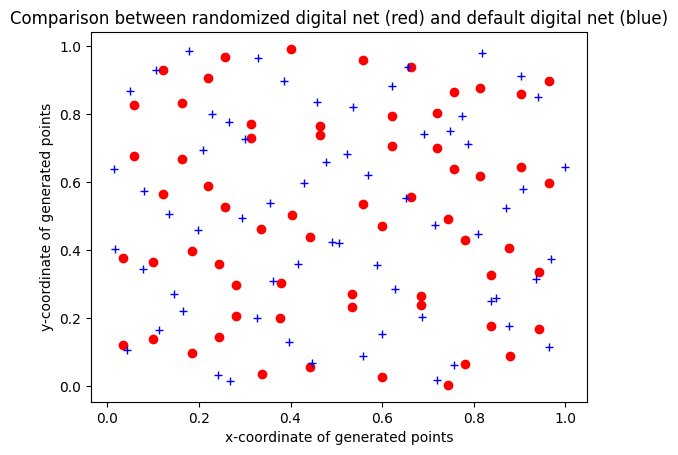

In [20]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro',Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.title("Comparison between randomized digital net (red) and default digital net (blue)")
plt.show()

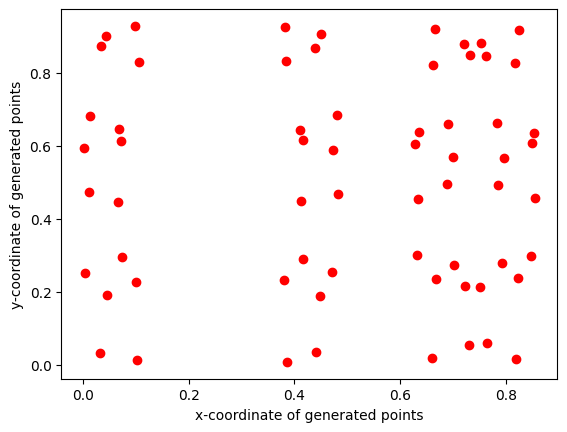

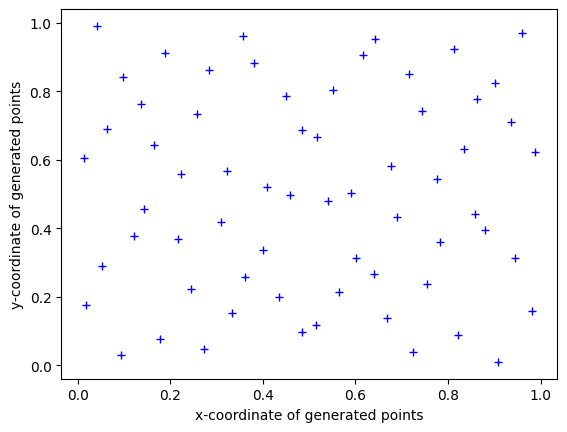

In [33]:
plt.plot(Randomized[:,0],Randomized[:,1],'ro')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()
plt.plot(Default[:,0],Default[:,1],'b+')
plt.xlabel("x-coordinate of generated points")
plt.ylabel("y-coordinate of generated points")
plt.show()

## Integration

### Sample Integration  

In [ ]:
d = 2
tol = 1e-3
dnet = qp.DigitalNetB2(dimension = d, generating_matrices= genseed)
print(dnet.m_max)
gaussian_net = qp.Gaussian(dnet,mean = 0, covariance=1/2)
dnetcomp = qp.DigitalNetB2(d)
gaussian_net_comp = qp.Gaussian(dnetcomp,mean = 0,covariance = 1/2)


In [24]:
solution_random,data_random = qp.CubQMCNetG(qp.Keister(gaussian_net),abs_tol = tol).integrate()
solution_default,data_default = qp.CubQMCNetG(qp.Keister(gaussian_net_comp),abs_tol= tol).integrate()
print("Integration data from a randomized digital net")
print(data_random)
print("\nIntegration data from the default digital net")
print(data_default)


ParameterError: Exceeding max samples (2^9) or max dimensions (2).

In [37]:
answer = qp.Keister(dnet).exact_integ(10)
print(f"Difference between randomized digital net results and exact answer {0}".format(abs(answer-solution_random)))
print(f"Difference between default digital net results and exact answer {0}".format(abs(answer-solution_default)))

Difference between randomized digital net results and exact answer 0
Difference between default digital net results and exact answer 0


### Error comparison between mean of means and median of means

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


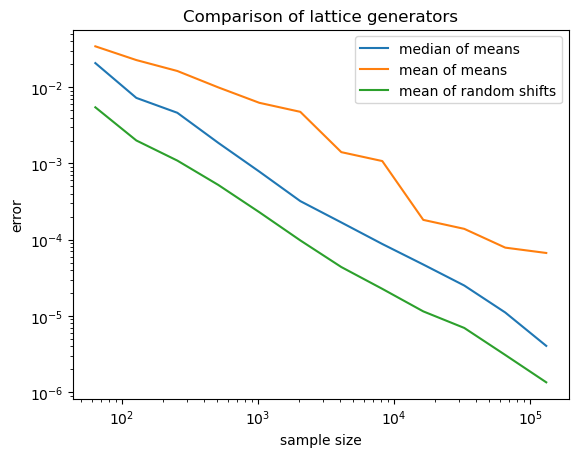

In [24]:
#mean of means vs. median of means

d = 2
N_min = 6
N_max = 18
N_list = 2**np.arange(N_min,N_max)
r = 11
num_trials = 25


error_median = np.zeros(N_max - N_min) 
error_mean = np.zeros(N_max - N_min) 
error_mean_onegen = np.zeros(N_max - N_min) 
for i in range(num_trials):
    y_median = []
    y_mean = []
    y_mean_one_gen = []
    print(i)
    list_of_keister_objects_random = []
    list_of_keister_objects_default = []
    y_randomized_list = []
    y_default_list = []
    for k in range(r):
        dnet = qp.DigitalNetB2(generating_matrices = 26,dimension=d)
        keister = qp.Keister(dnet)
        list_of_keister_objects_random.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)
        y_randomized_list.append(y)
        keister = qp.Keister(qp.DigitalNetB2(d))
        list_of_keister_objects_default.append(keister)
        x = keister.discrete_distrib.gen_samples(N_list.max())
        y = keister.f(x)    
        y_default_list.append(y) 
            
    for N in N_list:

        y_median.append(np.median([np.mean(y[:N]) for y in y_randomized_list]))
        y_mean_one_gen.append(np.mean([np.mean(y[:N]) for y in y_default_list]))
        y_mean.append(np.mean([np.mean(y[:N]) for y in y_randomized_list]))

    answer = keister.exact_integ(d)
    error_median += abs(answer-y_median)
    error_mean += abs(answer-y_mean)
    error_mean_onegen += abs(answer-y_mean_one_gen)

error_median /= num_trials
error_mean /= num_trials
error_mean_onegen /= num_trials

plt.loglog(N_list,error_median,label = "median of means")
plt.loglog(N_list,error_mean,label = "mean of means")
plt.loglog(N_list,error_mean_onegen,label = "mean of random shifts")
plt.xlabel("sample size")
plt.ylabel("error")
plt.title("Comparison of lattice generators")
plt.legend()
plt.savefig("./meanvsmedian.png")

